In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.io.fits as pyfits
from astropy.nddata import CCDData
from astropy.visualization import hist
from ccdproc import CCDData
from ccdproc import ccd_process
from astropy.table import Table, hstack, vstack, join
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from astropy.io import fits
from matplotlib import cm
import astropy.units as u
import astropy.constants as c
import os
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
file1 = 'GALAH_DR3_main_allstar_v2.fits'
data1 = pyfits.getdata(file1)

filename = 'GALAH_DR3_main_allstar_v2.fits'
fits_file = fits.open(filename)
allstar = fits_file[1].data
fits_file.close()

filename = 'GALAH_DR3_VAC_ages_v2.fits'
fits_file = fits.open(filename)
ages = fits_file[1].data
fits_file.close()

filename = 'GALAH_DR3_VAC_dynamics_v2.fits'
fits_file = fits.open(filename)
dyn = fits_file[1].data
fits_file.close()

files = join(allstar, dyn, keys = 'sobject_id')

data = join(files, ages, keys = 'sobject_id')

t = Table.read('simulation_data_220118.fits')

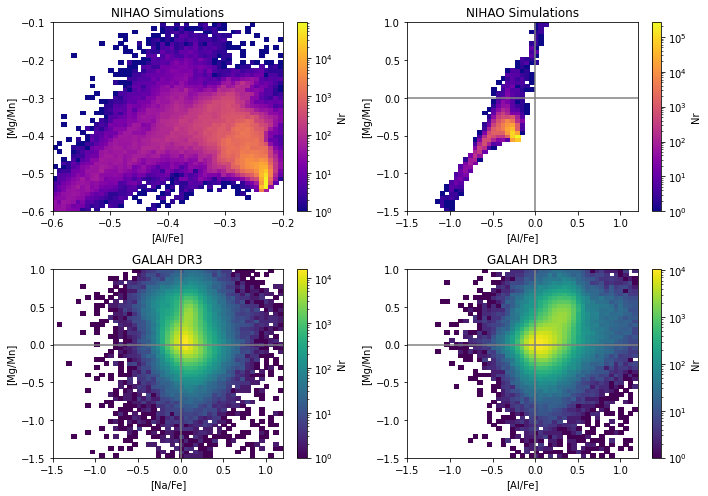

In [3]:
def plot_6_comp(e1, e2, e3, e4, e5):
    
    f, gs = plt.subplots(2,2,figsize=(10,7))#,sharex=True,sharey=True)


    ax = gs[0,0]
    p, x, y, s = ax.hist2d(
        t[e1+'_H']-t[e2+'_H'],
        t[e3+'_H']-t[e4+'_H'],
        bins = (np.linspace(-0.6, -0.2, 50), np.linspace(-0.6, -0.1, 50)),
        cmin = 1,
        norm = colors.LogNorm()
    );
    c = plt.colorbar(s, ax=ax)
    c.set_label('Nr')
    ax.set_xlabel('['+e1+'/'+e2+']')
    ax.set_ylabel('['+e3+'/'+e4+']')
    s.set_cmap('plasma')
    ax.set_title('NIHAO Simulations')
    ax.axvline(0, color='grey')
    ax.axhline(0, color = 'grey')
    
    ax = gs[0,1]
    p, x, y, s = ax.hist2d(
        t[e1+'_H']-t[e2+'_H'],
        t[e3+'_H']-t[e4+'_H'],
        bins = (np.linspace(-1.5, 1.2, 50), np.linspace(-1.5, 1, 50)),
        cmin = 1,
        norm = colors.LogNorm()
    );
    c = plt.colorbar(s, ax=ax)
    c.set_label('Nr')
    ax.set_xlabel('['+e1+'/'+e2+']')
    ax.set_ylabel('['+e3+'/'+e4+']')
    ax.set_title('NIHAO Simulations')
    s.set_cmap('plasma')
    ax.axvline(0, color='grey')
    ax.axhline(0, color = 'grey')

    ax = gs[1,0]
    p, x, y, s = ax.hist2d(
        data1[e5+'_fe'],
        data1[e3+'_fe']-data1[e4+'_fe'],
        bins = (np.linspace(-1.5, 1.2, 50), np.linspace(-1.5, 1, 50)),
        cmin = 1,
        norm = colors.LogNorm()
    );
    c = plt.colorbar(s, ax=ax)
    c.set_label('Nr')
    ax.set_xlabel('['+e5+'/'+e2+']')
    ax.set_ylabel('['+e3+'/'+e4+']')
    ax.set_title('GALAH DR3')
    s.set_cmap('viridis')
    ax.axvline(0, color='grey')
    ax.axhline(0, color = 'grey')
    
    ax = gs[1,1]
    p, x, y, s = ax.hist2d(
        data1[e1+'_fe'],
        data1[e3+'_fe']-data1[e4+'_fe'],
        bins = (np.linspace(-1.5, 1.2, 50), np.linspace(-1.5, 1, 50)),
        cmin = 1,
        norm = colors.LogNorm()
    );
    c = plt.colorbar(s,  ax=ax)
    c.set_label('Nr')
    ax.set_xlabel('['+e1+'/'+e2+']')
    ax.set_ylabel('['+e3+'/'+e4+']')
    ax.set_title('GALAH DR3')
    ax.axvline(0, color='grey')
    ax.axhline(0, color = 'grey')
    s.set_cmap('viridis')
    plt.tight_layout()
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    
    plt.savefig('['+e3+''+e4+'] vs ['+e1+''+e2+'].png', dpi=200,bbox_inches='tight')

    
plot_6_comp('Al', 'Fe', 'Mg', 'Mn', 'Na')

# FIX OVERLAPPING LABELS!

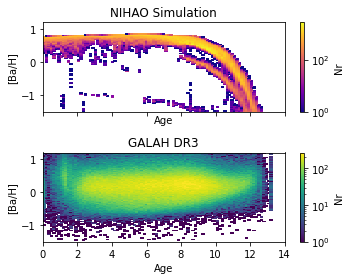

In [4]:
def plot_age(element):

    f, gs = plt.subplots(2,1,figsize=(5,4),sharex=True,sharey=True)

    ax = gs[0]
    p, x, y, s = ax.hist2d(
        13.8 - t['tform'],
        t[element+'_H'],
        bins = (np.linspace(0, 14, 100), np.linspace(-1.5, 1.2, 100)),
        cmin = 1,
        norm = colors.LogNorm()
    
        
    );
    c = plt.colorbar(s, ax=ax)
    c.set_label('Nr')
    ax.set_xlabel('Age')
    s.set_cmap('plasma')
    ax.set_ylabel('['+element+'/H]')
    ax.set_title('NIHAO Simulation')
    plt.tight_layout()
    
    qual = (
        (data['flag_sp'] == 0) &
        (data['flag_fe_h'] == 0) 
        #(data['flag_'+element+'_fe'] == 0)
    )
    
    ax = gs[1]
    p, x, y, s = ax.hist2d(
        data['age_bstep'][qual],
        data['Ba_fe'][qual]-data['fe_h'][qual],
        bins = (np.linspace(0,14,100),np.linspace(-1.5,1.2,100)),
        cmin = 1,
        norm = colors.LogNorm()
    );

    
    c = plt.colorbar(s, ax=ax)
    c.set_label('Nr')
    ax.set_xlabel('Age')
    ax.set_ylabel('['+element+'/H]')
    ax.set_title('GALAH DR3')
    plt.tight_layout()
    
    plt.savefig(element+'_H_time.png',dpi=200,bbox_inches='tight')
    
plot_age('Ba')

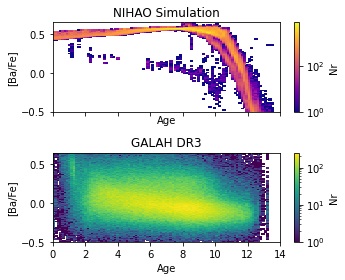

In [5]:
def plot_age(element):

    f, gs = plt.subplots(2,1,figsize=(5, 4),sharex=True,sharey=True)

    ax = gs[0]
    p, x, y, s = ax.hist2d(
        13.8 - t['tform'],
        t[element+'_H']-t['Fe_H'],
        bins = (np.linspace(0, 14, 100), np.linspace(-0.5,0.65, 100)),
        cmin = 1,
        norm = colors.LogNorm()
        
    );
    c = plt.colorbar(s, ax=ax)
    c.set_label('Nr')
    ax.set_xlabel('Age')
    ax.set_ylabel('['+element+'/Fe]')
    s.set_cmap('plasma')
    ax.set_title('NIHAO Simulation')
    plt.tight_layout()
    
    qual = (
        (data['flag_sp'] == 0) &
        (data['flag_fe_h'] == 0) 
        #(data['flag_'+element+'_fe'] == 0)
    )
    
    ax = gs[1]
    p, x, y, s = ax.hist2d(
        data['age_bstep'][qual],
        data['Ba_fe'][qual],
        bins = (np.linspace(0,14,100),np.linspace(-0.5,0.65,100)),
        cmin = 1,
        norm = colors.LogNorm()
    );

    
    c = plt.colorbar(s, ax=ax)
    c.set_label('Nr')
    ax.set_xlabel('Age')
    ax.set_ylabel('['+element+'/Fe]')
    ax.set_title('GALAH DR3')
    plt.tight_layout()
    
    plt.savefig(element+'_Fe_time.png',dpi=200,bbox_inches='tight')
    
plot_age('Ba')

In [6]:
lower_age_array = np.linspace(0.1,4.5,10) # [1,2,3,4]

r_table = dict()

def lower_ages(element, plot=True):
    
    low_limits = dict()
    low_limits['Cr'] = [-0.7,-0.45]
    low_limits['V'] = [-1,-0.7]
    low_limits['Al'] = [-1,-0.7]
    low_limits['Co'] = [-1,-0.7]
    low_limits['Mg'] = [-1,-0.75]
    low_limits['Ba'] = [-0.25,0.2]
    low_limits['C'] = [-0.6,-0.2]
    low_limits['Si'] = [-0.6,-0.2]
    low_limits['O'] = [-0.6,-0.2]
    low_limits['Mn'] = [-0.6,-0.2]
        
    high_limits = dict()
    high_limits['V'] = [-0.5,0.1]
    high_limits['Al'] = [-0.5,0.1]
    high_limits['Co'] = [-0.5,0.1]
    high_limits['Cr'] = [-0.25,0.25]
    high_limits['Mg'] = [-0.5,-0.1]
    high_limits['Ba'] = [0.25,0.75]
    high_limits['C'] = [-0.1,0.4]
    high_limits['O'] = [-0.1,0.4]
    high_limits['Si'] = [-0.1,0.4]
    high_limits['Mn'] = [-0.1,0.4]
    
    #lower_ages = np.arange(0,5,0.5) # [1,2,3,4]
    
    r_age = []

    for lower_age in lower_age_array:

        low_sequence = (
            (t['tform'] > lower_age) & 
            (t['tform'] < 5) & 
            (t[element+'_H'] > low_limits[element][0]) &
            (t[element+'_H'] < low_limits[element][1])
        )

        high_sequence = (
            (t['tform'] > lower_age) & 
            (t['tform'] < 5) & 
            (t[element+'_H'] > high_limits[element][0]) &
            (t[element+'_H'] < high_limits[element][1])
        )

        if plot == True:
            f, (ax1, ax2) = plt.subplots(1,2,sharex=True,sharey=True)
            ax1.scatter(
                t['tform'][low_sequence],
                t[element+'_H'][low_sequence],
                alpha=0.1,
                s=1
            )
            ax2.scatter(
                t['tform'][high_sequence],
                t[element+'_H'][high_sequence],
                alpha=0.1,
                s=1
            )
        p16, p50, p84 = np.percentile(t[element+'_H'][low_sequence], q=[16,50,84])
        mu_1 = p50
        sigma_1 = (p84-p16)/2

        p16, p50, p84 = np.percentile(t[element+'_H'][high_sequence], q=[16,50,84])
        mu_2 = p50
        sigma_2 = (p84-p16)/2
        
        if element=='Co':
            print(mu_1,sigma_1,mu_2,sigma_2)

        r = abs(mu_1 - mu_2) / np.sqrt(sigma_1**2 + sigma_2**2)
        r_age.append(r)
        
    r_table[element] = np.array(r_age)
    
    
lower_ages(element='Mg',plot=False)
lower_ages(element='Ba',plot=False)
lower_ages(element='Mn',plot=False)
lower_ages(element='Cr',plot=False)
lower_ages(element='V',plot=False)
lower_ages(element='Al',plot=False)
lower_ages(element='Co',plot=False)
lower_ages(element='C',plot=False)
lower_ages(element='O',plot=False)
lower_ages(element='Si',plot=False)


-0.8405967929680491 0.09449011885915626 -0.25785199372580614 0.1455394493835029
-0.8405967929680491 0.09449011885915626 -0.25785199372580614 0.1455394493835029
-0.8405967929680491 0.09449011885915626 -0.25785199372580614 0.1455394493835029
-0.8405759605936876 0.09447360337634736 -0.25785199372580614 0.1455394493835029
-0.8314552884343067 0.09166736831932498 -0.25785199372580614 0.1455394493835029
-0.8046285221358667 0.09408989700386239 -0.257850659239387 0.14553735134268436
-0.8526050056052372 0.08474064253676084 -0.2556983609814125 0.14347522793152082
-0.8452671947074037 0.07723381316640587 -0.22913605928836134 0.12637680397853968
-0.8051828911033043 0.041851105881679396 -0.17158315367780297 0.0895669137635571
-0.7789339512740292 0.02723842000367488 -0.11817115379694698 0.06882872336847158


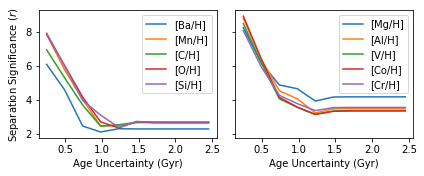

In [7]:
f, gs = plt.subplots(1,2,figsize=(6,2.5),sharex=True,sharey=True)
ax = gs[0]
ax.plot((5-np.array(lower_age_array))/2., r_table['Ba'],label='[Ba/H]')
ax.plot((5-np.array(lower_age_array))/2., r_table['Mn'],label='[Mn/H]')
ax.plot((5-np.array(lower_age_array))/2., r_table['C'],label='[C/H]')
ax.plot((5-np.array(lower_age_array))/2., r_table['O'],label='[O/H]')
ax.plot((5-np.array(lower_age_array))/2., r_table['Si'],label='[Si/H]')
ax.set_xlabel('Age Uncertainty (Gyr)')
ax.set_ylabel('Separation Significance ($r$)')

ax.legend()

ax = gs[1]
ax.plot((5-np.array(lower_age_array))/2., r_table['Mg'],label='[Mg/H]')
ax.plot((5-np.array(lower_age_array))/2., r_table['Al'],label='[Al/H]')
ax.plot((5-np.array(lower_age_array))/2., r_table['V'],label='[V/H]')
ax.plot((5-np.array(lower_age_array))/2., r_table['Co'],label='[Co/H]')
ax.plot((5-np.array(lower_age_array))/2., r_table['Cr'],label='[Cr/H]')
ax.set_xlabel('Age Uncertainty (Gyr)')
ax.legend()

plt.tight_layout()
bbox_inches='tight'
plt.savefig('same_axis_r_age.png')

In [8]:
sim_low_Mn = ((t['Mn_H'] < -0.2) & (t['Mn_H'] > -0.6))& (t['tform'] > 4) &  (t['tform'] < 5) 
sim_high_Mn = ((t['Mn_H'] < 0.4) & (t['Mn_H'] > -0.1))& (t['tform'] > 4) &  (t['tform'] < 5) 
sim_low_Si = ((t['Si_H'] < -0.2) & (t['Si_H'] > -0.6))& (t['tform'] > 4) &  (t['tform'] < 5) 
sim_high_Si = ((t['Si_H'] < 0.4) & (t['Si_H'] > -0.1))& (t['tform'] > 4) &  (t['tform'] < 5) 
sim_low_O = ((t['O_H'] < -0.2) & (t['O_H'] > -0.6))& (t['tform'] > 4) &  (t['tform'] < 5) 
sim_high_O = ((t['O_H'] < 0.4) & (t['O_H'] > -0.1))& (t['tform'] > 4) &  (t['tform'] < 5) 
sim_low_C = ((t['C_H'] < -0.2) & (t['C_H'] > -0.6))& (t['tform'] > 4) &  (t['tform'] < 5) 
sim_high_C = ((t['C_H'] < 0.4) & (t['C_H'] > -0.1))& (t['tform'] > 4) &  (t['tform'] < 5) 
sim_low_Co = ((t['Co_H'] < -0.7) & (t['Co_H'] > -1))& (t['tform'] > 4) &  (t['tform'] < 5) 
sim_high_Co = ((t['Co_H'] < 0.1) & (t['Co_H'] > -0.5))& (t['tform'] > 4) &  (t['tform'] < 5)
sim_low_V = ((t['V_H'] < -0.7) & (t['V_H'] > -1))& (t['tform'] > 4) &  (t['tform'] < 5) 
sim_high_V = ((t['V_H'] < 0.1) & (t['V_H'] > -0.5))& (t['tform'] > 4) &  (t['tform'] < 5)
sim_low_Al = ((t['Al_H'] < -0.7) & (t['Al_H'] > -1))& (t['tform'] > 4) &  (t['tform'] < 5) 
sim_high_Al = ((t['Al_H'] < 0.1) & (t['Al_H'] > -0.5))& (t['tform'] > 4) &  (t['tform'] < 5)
sim_low_Ba = ((t['Ba_H'] < 0.2) & (t['Ba_H'] > -0.25))& (t['tform'] > 4) &  (t['tform'] < 5) 
sim_high_Ba = ((t['Ba_H'] < 0.75) & (t['Ba_H'] > 0.25))& (t['tform'] > 4) &  (t['tform'] < 5) 
sim_low_Cr = ((t['Cr_H'] < -0.45) & (t['Cr_H'] > -0.7))& (t['tform'] > 4) &  (t['tform'] < 5) 
sim_high_Cr = ((t['Cr_H'] < 0.25) & (t['Cr_H'] > -0.25)) & (t['tform'] > 4) &  (t['tform'] < 5) 
sim_low_Mg = ((t['Mg_H'] < -0.75) & (t['Mg_H'] > -1)) & (t['tform'] > 4) &  (t['tform'] < 5) 
sim_high_Mg = ((t['Mg_H'] < -0.1) & (t['Mg_H'] > -0.5)) & (t['tform'] > 4) &  (t['tform'] < 5)

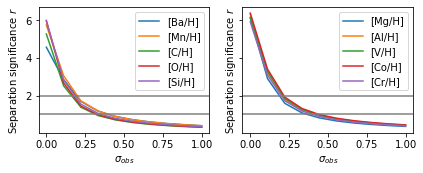

In [9]:
f, gs = plt.subplots(1,2,figsize=(6,2.5),sharex=True,sharey=True)

ax = gs[0]

p16, p50, p84 = np.percentile(t['Ba_H'][sim_low_Ba], q=[16,50,84])
mu_1 = p50
sigma_1 = (p84-p16)/2
p16, p50, p84 = np.percentile(t['Ba_H'][sim_high_Ba], q=[16,50,84])
mu_2 = p50
sigma_2 = (p84-p16)/2
sigma_obs = np.linspace(0,1,10)
sigma_1obs = np.sqrt(sigma_1**2 + sigma_obs**2)
sigma_2obs = np.sqrt(sigma_2**2 + sigma_obs**2)
r_obs = abs(mu_1 - mu_2) / np.sqrt(sigma_1obs**2 + sigma_2obs**2) 
r_sim = abs(mu_1 - mu_2) / np.sqrt(sigma_1**2 + sigma_2**2) 
ax.plot(sigma_obs, r_obs, label = '[Ba/H]')

p16, p50, p84 = np.percentile(t['Mn_H'][sim_low_Mn], q=[16,50,84])
mu_1 = p50
sigma_1 = (p84-p16)/2
p16, p50, p84 = np.percentile(t['Mn_H'][sim_high_Mn], q=[16,50,84])
mu_2 = p50
sigma_2 = (p84-p16)/2
sigma_obs = np.linspace(0,1,10)
sigma_1obs = np.sqrt(sigma_1**2 + sigma_obs**2)
sigma_2obs = np.sqrt(sigma_2**2 + sigma_obs**2)
r_obs = abs(mu_1 - mu_2) / np.sqrt(sigma_1obs**2 + sigma_2obs**2) 
r_sim = abs(mu_1 - mu_2) / np.sqrt(sigma_1**2 + sigma_2**2) 
ax.plot(sigma_obs, r_obs, label = '[Mn/H]')


p16, p50, p84 = np.percentile(t['C_H'][sim_low_C], q=[16,50,84])
mu_1 = p50
sigma_1 = (p84-p16)/2
p16, p50, p84 = np.percentile(t['C_H'][sim_high_C], q=[16,50,84])
mu_2 = p50
sigma_2 = (p84-p16)/2
sigma_obs = np.linspace(0,1,10)
sigma_1obs = np.sqrt(sigma_1**2 + sigma_obs**2)
sigma_2obs = np.sqrt(sigma_2**2 + sigma_obs**2)
r_obs = abs(mu_1 - mu_2) / np.sqrt(sigma_1obs**2 + sigma_2obs**2) 
r_sim = abs(mu_1 - mu_2) / np.sqrt(sigma_1**2 + sigma_2**2) 
ax.plot(sigma_obs, r_obs, label = '[C/H]')

p16, p50, p84 = np.percentile(t['O_H'][sim_low_O], q=[16,50,84])
mu_1 = p50
sigma_1 = (p84-p16)/2
p16, p50, p84 = np.percentile(t['O_H'][sim_high_O], q=[16,50,84])
mu_2 = p50
sigma_2 = (p84-p16)/2
sigma_obs = np.linspace(0,1,10)
sigma_1obs = np.sqrt(sigma_1**2 + sigma_obs**2)
sigma_2obs = np.sqrt(sigma_2**2 + sigma_obs**2)
r_obs = abs(mu_1 - mu_2) / np.sqrt(sigma_1obs**2 + sigma_2obs**2) 
r_sim = abs(mu_1 - mu_2) / np.sqrt(sigma_1**2 + sigma_2**2) 
ax.plot(sigma_obs, r_obs, label = '[O/H]')

p16, p50, p84 = np.percentile(t['Si_H'][sim_low_Si], q=[16,50,84])
mu_1 = p50
sigma_1 = (p84-p16)/2
p16, p50, p84 = np.percentile(t['Si_H'][sim_high_Si], q=[16,50,84])
mu_2 = p50
sigma_2 = (p84-p16)/2
sigma_obs = np.linspace(0,1,10)
sigma_1obs = np.sqrt(sigma_1**2 + sigma_obs**2)
sigma_2obs = np.sqrt(sigma_2**2 + sigma_obs**2)
r_obs = abs(mu_1 - mu_2) / np.sqrt(sigma_1obs**2 + sigma_2obs**2) 
r_sim = abs(mu_1 - mu_2) / np.sqrt(sigma_1**2 + sigma_2**2) 
ax.plot(sigma_obs, r_obs, label='[Si/H]')
ax.set_xlabel('$\sigma_{obs}$')
ax.set_ylabel('Separation significance $r$')
ax.axhline(1, color='grey')
ax.axhline(2, color = 'grey')
ax.legend()



ax = gs[1]

p16, p50, p84 = np.percentile(t['Mg_H'][sim_low_Mg], q=[16,50,84])
mu_1 = p50
sigma_1 = (p84-p16)/2
p16, p50, p84 = np.percentile(t['Mg_H'][sim_high_Mg], q=[16,50,84])
mu_2 = p50
sigma_2 = (p84-p16)/2
sigma_obs = np.linspace(0,1,10)
sigma_1obs = np.sqrt(sigma_1**2 + sigma_obs**2)
sigma_2obs = np.sqrt(sigma_2**2 + sigma_obs**2)
r_obs = abs(mu_1 - mu_2) / np.sqrt(sigma_1obs**2 + sigma_2obs**2) 
r_sim = abs(mu_1 - mu_2) / np.sqrt(sigma_1**2 + sigma_2**2) 
ax.plot(sigma_obs, r_obs, label = '[Mg/H]')

p16, p50, p84 = np.percentile(t['Al_H'][sim_low_Al], q=[16,50,84])
mu_1 = p50
sigma_1 = (p84-p16)/2
p16, p50, p84 = np.percentile(t['Al_H'][sim_high_Al], q=[16,50,84])
mu_2 = p50
sigma_2 = (p84-p16)/2
sigma_obs = np.linspace(0,1,10)
sigma_1obs = np.sqrt(sigma_1**2 + sigma_obs**2)
sigma_2obs = np.sqrt(sigma_2**2 + sigma_obs**2)
r_obs = abs(mu_1 - mu_2) / np.sqrt(sigma_1obs**2 + sigma_2obs**2) 
r_sim = abs(mu_1 - mu_2) / np.sqrt(sigma_1**2 + sigma_2**2) 
ax.plot(sigma_obs, r_obs, label = '[Al/H]')

p16, p50, p84 = np.percentile(t['V_H'][sim_low_V], q=[16,50,84])
mu_1 = p50
sigma_1 = (p84-p16)/2
p16, p50, p84 = np.percentile(t['V_H'][sim_high_V], q=[16,50,84])
mu_2 = p50
sigma_2 = (p84-p16)/2
sigma_obs = np.linspace(0,1,10)
sigma_1obs = np.sqrt(sigma_1**2 + sigma_obs**2)
sigma_2obs = np.sqrt(sigma_2**2 + sigma_obs**2)
r_obs = abs(mu_1 - mu_2) / np.sqrt(sigma_1obs**2 + sigma_2obs**2) 
r_sim = abs(mu_1 - mu_2) / np.sqrt(sigma_1**2 + sigma_2**2) 
ax.plot(sigma_obs, r_obs, label = '[V/H]')

p16, p50, p84 = np.percentile(t['Co_H'][sim_low_Co], q=[16,50,84])
mu_1 = p50
sigma_1 = (p84-p16)/2
p16, p50, p84 = np.percentile(t['Co_H'][sim_high_Co], q=[16,50,84])
mu_2 = p50
sigma_2 = (p84-p16)/2
sigma_obs = np.linspace(0,1,10)
sigma_1obs = np.sqrt(sigma_1**2 + sigma_obs**2)
sigma_2obs = np.sqrt(sigma_2**2 + sigma_obs**2)
r_obs = abs(mu_1 - mu_2) / np.sqrt(sigma_1obs**2 + sigma_2obs**2) 
r_sim = abs(mu_1 - mu_2) / np.sqrt(sigma_1**2 + sigma_2**2) 
ax.plot(sigma_obs, r_obs, label = '[Co/H]')

p16, p50, p84 = np.percentile(t['Cr_H'][sim_low_Cr], q=[16,50,84])
mu_1 = p50
sigma_1 = (p84-p16)/2
p16, p50, p84 = np.percentile(t['Cr_H'][sim_high_Cr], q=[16,50,84])
mu_2 = p50
sigma_2 = (p84-p16)/2
sigma_obs = np.linspace(0,1,10)
sigma_1obs = np.sqrt(sigma_1**2 + sigma_obs**2)
sigma_2obs = np.sqrt(sigma_2**2 + sigma_obs**2)
r_obs = abs(mu_1 - mu_2) / np.sqrt(sigma_1obs**2 + sigma_2obs**2) 
r_sim = abs(mu_1 - mu_2) / np.sqrt(sigma_1**2 + sigma_2**2) 
ax.plot(sigma_obs, r_obs, label = '[Cr/H]')
ax.set_xlabel('$\sigma_{obs}$')
ax.set_ylabel('Separation significance $r$')
ax.axhline(1, color='grey')
ax.axhline(2, color = 'grey')

ax.legend()

bbox_inches='tight'
plt.tight_layout()
plt.savefig('same_axis_r_sigma.png')

In [ ]:
### MAKE MORE ELEGANT   
    # Determining the distance between the two peaks
    separation = mean2-mean1
    # Using this to find the distance from each peak to the centre of the two 
    gap_to_centre = separation/2
    # Defining the lower and upper bounds of both histograms 
    little_lower_bound = mean1-gap_to_centre
    little_upper_bound = mean1+gap_to_centre
    big_lower_bound = mean2-gap_to_centre
    big_upper_bound = mean2+gap_to_centre
    # The little_upper_bound and big_lower_bound are equal 
    centre_boundary = little_upper_bound

    # Checking for reasonable-ness
    plt.axvline(little_lower_bound)
    plt.axvline(big_upper_bound)
    plt.axvline(centre_boundary)
    
#     accreted_bounds = (data > little_lower_bound) & (data < centre_boundary)
#     in_situ_bounds = (data > centre_boundary) & (data < big_upper_bound)
    
    # Defining the lower and higher sequences of the bimodal histogram via the boundaries 
    low_sequence = (
            (data > little_lower_bound) &
            (data < centre_boundary)
        )

    high_sequence = (
            (data > centre_boundary) &
            (data < big_upper_bound)
        )

In [ ]:
lower_age_array = np.linspace(0.1,4.5,10) # [1,2,3,4]

r_table = dict()

def lower_ages(element, plot=True):
    
    ## NEED TO AUTOMATE ##
    
    low_limits = dict()
    low_limits['Cr'] = [-0.7,-0.45]
    low_limits['V'] = [-1,-0.7]
    low_limits['Al'] = [-1,-0.7]
    low_limits['Co'] = [-1,-0.7]
    low_limits['Mg'] = [-1,-0.75]
    low_limits['Ba'] = [-0.25,0.2]
    low_limits['C'] = [-0.6,-0.2]
    low_limits['Si'] = [-0.6,-0.2]
    low_limits['O'] = [-0.6,-0.2]
    low_limits['Mn'] = [-0.6,-0.2]
        
    high_limits = dict()
    high_limits['V'] = [-0.5,0.1]
    high_limits['Al'] = [-0.5,0.1]
    high_limits['Co'] = [-0.5,0.1]
    high_limits['Cr'] = [-0.25,0.25]
    high_limits['Mg'] = [-0.5,-0.1]
    high_limits['Ba'] = [0.25,0.75]
    high_limits['C'] = [-0.1,0.4]
    high_limits['O'] = [-0.1,0.4]
    high_limits['Si'] = [-0.1,0.4]
    high_limits['Mn'] = [-0.1,0.4]
        
    r_age = []

    for lower_age in lower_age_array:

        low_sequence = (
            (sim['tform'] > lower_age) & 
            (sim['tform'] < 5) & 
            (sim[element+'_H'] > low_limits[element][0]) &
            (sim[element+'_H'] < low_limits[element][1])
        )

        high_sequence = (
            (sim['tform'] > lower_age) & 
            (sim['tform'] < 5) & 
            (sim[element+'_H'] > high_limits[element][0]) &
            (sim[element+'_H'] < high_limits[element][1])
        )

        if plot == True:
            f, (ax1, ax2) = plt.subplots(1,2,sharex=True,sharey=True)
            ax1.scatter(
                sim['tform'][low_sequence],
                sim[element+'_H'][low_sequence],
                alpha=0.1,
                s=1
            )
            ax2.scatter(
                sim['tform'][high_sequence],
                sim[element+'_H'][high_sequence],
                alpha=0.1,
                s=1
            )
        p16, p50, p84 = np.percentile(sim[element+'_H'][low_sequence], q=[16,50,84])
        mu_1 = p50
        sigma_1 = (p84-p16)/2

        p16, p50, p84 = np.percentile(sim[element+'_H'][high_sequence], q=[16,50,84])
        mu_2 = p50
        sigma_2 = (p84-p16)/2
        
        if element=='Co':
            print(mu_1,sigma_1,mu_2,sigma_2)

        r = abs(mu_1 - mu_2) / np.sqrt(sigma_1**2 + sigma_2**2)
        r_age.append(r)
        
    r_table[element] = np.array(r_age)
    


In [ ]:
table_text_2 = [
    [r'\begin{table}'],
    [r'    \centering'],
    [r'    \caption{Observational uncertainties for each element that allow to separate the in-situ and accreted sequences at $8-9\,\mathrm{Gyr}$ with 95\% ($r>2$) and 68\% ($r>1$) certainty. The last rows report the percentage of measurements and their the median uncertainties for the element reported by GALAH DR3 (as indicators of how often and how well the element can be measured.}'],
    [r'    \begin{tabular}{cccccc}'],
    [r'    \hline'],
    [r'    Element & $\sigma_\text{obs}$ 95\% & $\sigma_\text{obs}$ 68\% & Det. Rate & $\sigma_\text{GALAH}$ \\'],
    [r'    \hline \hline']
]

def obs_error(element):
    
    # Code that computes allowed uncertainities for 68% and 95% confidence
    sigma_obs_95 = 0.0
    sigma_obs_68 = 1.0
    det_rate = 0.0
    sigma_GALAH = 1.0
    r = 5.3
    
    return(r'    {['+element+'/H]}  & '+str(sigma_obs_95)+' & '+str(sigma_obs_68)+' & '+str(det_rate)+' & '+str(sigma_GALAH)+r' \\')
    
for element in ['C', 'Mn', 'Si', 'Ba', 'V', 'Co', 'Al', 'Cr','O']:
    table_text.append([obs_error(element)])
#     [r'    {[C/H]}  & & & & & 5.3 \\'],
#     [r'    {[O/H]}  & & & & & 6.0 \\'],
#     [r'    {[Mg/H]} & & & & & 6.1 \\'],
#     [r'    {[Al/H]} & & & & & 6.3 \\'],
#     [r'    {[Si/H]} & & & & & 6.0 \\'],
#     [r'    {[V/H]}  & & & & & 6.1 \\'],
#     [r'    {[Cr/H]} & & & & & 5.9 \\'],
#     [r'    {[Mn/H]} & & & & & 5.7 \\'],
#     [r'    {[Co/H]} & & & & & 6.4 \\'],
#     [r'    {[Ba/H]} & & & & & 4.6 \\'],
table_text_2.append([r'    \hline'])
table_text_2.append([r'    \end{tabular}'])
table_text_2.append([r'    \label{tab:r_values_simulation}'])
table_text_2.append([r'\end{table}'])

np.savetxt('tables/obs_error_separation.tex',table_text_2,fmt='%s')